# Data frames

We're going to use a real [kaggle competition](https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries) data set to explore Pandas dataframes. Grab the [rent.csv.zip](https://mlbook.explained.ai/data/rent.csv.zip) file and unzip it.

In [198]:
import pandas as pd
df = pd.read_csv("data/rent.csv", parse_dates=['created'])
df.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,['https://photos.renthop.com/2/7211212_1ed4542...,3000,792 Metropolitan Avenue
1,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"['Doorman', 'Elevator', 'Fitness Center', 'Cat...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,['https://photos.renthop.com/2/7150865_be3306c...,5465,808 Columbus Avenue


In [199]:
df.head(2).T

,0,1
bathrooms,1.5,1
bedrooms,3,2
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130
created,2016-06-24 07:54:24,2016-06-12 12:19:27
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,
display_address,Metropolitan Avenue,Columbus Avenue
features,[],"['Doorman', 'Elevator', 'Fitness Center', 'Cat..."
interest_level,medium,low
latitude,40.7145,40.7947
listing_id,7211212,7150865


## Sniff the data

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null datetime64[ns]
description        47906 non-null object
display_address    49217 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49342 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 5.6+ MB


In [201]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [202]:
df.price.sort_values(ascending=False).head(10)

19558    4490000
9590     1150000
30689    1070000
29665    1070000
10581     135000
25538     111111
45674     100000
29082      90000
7336       85000
47995      80000
Name: price, dtype: int64

### Get column

In [203]:
df.price.head(5) # works only on right hand side of assignment or in expression

0    3000
1    5465
2    2850
3    3275
4    3350
Name: price, dtype: int64

In [204]:
df['price'].head(5)

0    3000
1    5465
2    2850
3    3275
4    3350
Name: price, dtype: int64

Can grab values and take average:

In [205]:
prices = df['price']
avg_rent = prices.mean()
print(f"Average rent is ${avg_rent:.0f}")

Average rent is $3830


In [206]:
bybaths = df.groupby(['bathrooms']).mean()
bybaths

,bedrooms,latitude,listing_id,longitude,price
bathrooms,,,,,
0.0,0.849840,40.756168,7.027187e+06,-73.970516,4001.530351
1.0,1.251662,40.740873,7.024082e+06,-73.954589,3233.940490
1.5,2.271318,40.748909,7.026701e+06,-73.965980,4257.066667
2.0,2.685117,40.750483,7.022952e+06,-73.974603,5501.066971
2.5,2.851986,40.759694,7.018145e+06,-73.968822,9028.920578
3.0,3.293960,40.764863,7.028051e+06,-73.999571,10391.060403
3.5,3.542857,40.764344,7.061043e+06,-73.964676,14534.785714
4.0,4.301887,40.513449,7.025477e+06,-73.492230,16239.213836
4.5,4.137931,40.780462,7.058375e+06,-73.900438,20868.000000


In [207]:
bybaths = bybaths.reset_index() # overcome quirk in Pandas
bybaths.head(3)

,bathrooms,bedrooms,latitude,listing_id,longitude,price
0,0.0,0.849840,40.756168,7.027187e+06,-73.970516,4001.530351
1,1.0,1.251662,40.740873,7.024082e+06,-73.954589,3233.940490
2,1.5,2.271318,40.748909,7.026701e+06,-73.965980,4257.066667


In [208]:
bybaths[['bathrooms','price']] # print just num baths, avg price

,bathrooms,price
0,0.0,4001.530351
1,1.0,3233.940490
2,1.5,4257.066667
3,2.0,5501.066971
4,2.5,9028.920578
5,3.0,10391.060403
6,3.5,14534.785714
7,4.0,16239.213836
8,4.5,20868.000000
9,5.0,27214.700000


### Columns vs subsets

In [209]:
# get column
df['bedrooms'].head(5)

0    3
1    2
2    1
3    1
4    4
Name: bedrooms, dtype: int64

In [210]:
df[['bedrooms','bathrooms']].head(3)

,bedrooms,bathrooms
0,3,1.5
1,2,1.0
2,1,1.0


### Get rows

In [211]:
# get index 3 row
df.iloc[3] # same as df.iloc[3,:]

bathrooms                                                          1
bedrooms                                                           1
building_id                         28d9ad350afeaab8027513a3e52ac8d5
created                                          2016-04-18 02:22:02
description        Building Amenities - Garage - Garden - fitness...
display_address                                     East 49th Street
features                               ['Hardwood Floors', 'No Fee']
interest_level                                                   low
latitude                                                     40.7539
listing_id                                                   6888711
longitude                                                   -73.9677
manager_id                          1067e078446a7897d2da493d2f741316
photos             ['https://photos.renthop.com/2/6888711_6e660ce...
price                                                           3275
street_address                    

In [212]:
df.iloc[0:2] # first two rows

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,['https://photos.renthop.com/2/7211212_1ed4542...,3000,792 Metropolitan Avenue
1,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"['Doorman', 'Elevator', 'Fitness Center', 'Cat...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,['https://photos.renthop.com/2/7150865_be3306c...,5465,808 Columbus Avenue


In [213]:
df.iloc[0:2][['created','features']] # first two rows, show 2 columns

,created,features
0,2016-06-24 07:54:24,[]
1,2016-06-12 12:19:27,"['Doorman', 'Elevator', 'Fitness Center', 'Cat..."


### Get rows by index key

In [214]:
df = df.set_index('listing_id')
df.head(3)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address
listing_id,,,,,,,,,,,,,,
7211212,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,-73.9425,5ba989232d0489da1b5f2c45f6688adc,['https://photos.renthop.com/2/7211212_1ed4542...,3000,792 Metropolitan Avenue
7150865,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"['Doorman', 'Elevator', 'Fitness Center', 'Cat...",low,40.7947,-73.9667,7533621a882f71e25173b27e3139d83d,['https://photos.renthop.com/2/7150865_be3306c...,5465,808 Columbus Avenue
6887163,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"['Laundry In Building', 'Dishwasher', 'Hardwoo...",high,40.7388,-74.0018,d9039c43983f6e564b1482b273bd7b01,['https://photos.renthop.com/2/6887163_de85c42...,2850,241 W 13 Street


In [215]:
df.loc[7150865]

bathrooms                                                          1
bedrooms                                                           2
building_id                         c5c8a357cba207596b04d1afd1e4f130
created                                          2016-06-12 12:19:27
description                                                         
display_address                                      Columbus Avenue
features           ['Doorman', 'Elevator', 'Fitness Center', 'Cat...
interest_level                                                   low
latitude                                                     40.7947
longitude                                                   -73.9667
manager_id                          7533621a882f71e25173b27e3139d83d
photos             ['https://photos.renthop.com/2/7150865_be3306c...
price                                                           5465
street_address                                   808 Columbus Avenue
Name: 7150865, dtype: object

In [216]:
df = df.reset_index()
df.head(3)

,listing_id,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address
0,7211212,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,-73.9425,5ba989232d0489da1b5f2c45f6688adc,['https://photos.renthop.com/2/7211212_1ed4542...,3000,792 Metropolitan Avenue
1,7150865,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"['Doorman', 'Elevator', 'Fitness Center', 'Cat...",low,40.7947,-73.9667,7533621a882f71e25173b27e3139d83d,['https://photos.renthop.com/2/7150865_be3306c...,5465,808 Columbus Avenue
2,6887163,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"['Laundry In Building', 'Dishwasher', 'Hardwoo...",high,40.7388,-74.0018,d9039c43983f6e564b1482b273bd7b01,['https://photos.renthop.com/2/6887163_de85c42...,2850,241 W 13 Street


Allows non-unique indexes

In [217]:
df_beds = df.set_index('bedrooms')
df_beds.loc[3].head(3)

,listing_id,bathrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address
bedrooms,,,,,,,,,,,,,,
3,7211212,1.5,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,-73.9425,5ba989232d0489da1b5f2c45f6688adc,['https://photos.renthop.com/2/7211212_1ed4542...,3000,792 Metropolitan Avenue
3,6858062,1.0,205f95d4a78f1f3befda48b89edc9669,2016-04-12 02:39:45,BEAUTIFUL 2 BEDROOM POSSIBLE CONVERSION INTO T...,Madison Avenue,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",low,40.7454,-73.9845,3793e58c60343a3fd6846ca2d2ef3c7f,['https://photos.renthop.com/2/6858062_5cfb9d9...,4395,121 Madison Avenue
3,6890563,1.0,be6b7c3fdf3f63a2756306f4af7788a6,2016-04-18 04:46:30,These pictures are from a similarlisting.,Thompson St,['Washer/Dryer'],low,40.7231,-74.0044,64249f81378907ae7cf65e8ccb4bd8dc,['https://photos.renthop.com/2/6890563_1b98fae...,3733,25 Thompson St


## Checking for missing values

In [218]:
df.isnull().head(5)

,listing_id,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [219]:
df.isnull().any()

listing_id         False
bathrooms          False
bedrooms           False
building_id        False
created            False
description         True
display_address     True
features           False
interest_level     False
latitude           False
longitude          False
manager_id         False
photos             False
price              False
street_address      True
dtype: bool

Find all rows in data frame where description is missing:

In [220]:
df.description.isnull().head(5)

0    False
1    False
2    False
3    False
4    False
Name: description, dtype: bool

In [221]:
df[df.description.isnull()].head(5)

,listing_id,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address
57,6923973,1.0,0,ca9c594aba4534beae6ce71def209994,2016-04-26 01:39:25,NaN,East 74th Street,[],low,40.7699,-73.9565,b7de4cb395920136663132057fa89d84,[],2700,315 East 74th Street
67,6891766,1.0,1,5a922b81c28dd44b2ffadf603c90c0d5,2016-04-19 01:42:01,NaN,West 50th Street,"['Doorman', 'Fitness Center', 'Pool', 'Elevato...",low,40.7619,-73.9854,62b685cc0d876c3a1a51d63a0d6a8082,[],3697,250 West 50TH Street
73,6890772,1.0,1,bde4018a1c4f290eb89af695a7a1d644,2016-04-18 04:59:44,NaN,East 85th Street,"['Elevator', 'Cats Allowed', 'Dogs Allowed', '...",low,40.7777,-73.9532,d1737922fe92ccb0dc37ba85589e6415,[],2945,225 East 85th Street
174,6853469,1.0,1,0,2016-04-10 05:13:03,NaN,83rd Avenue,"['Doorman', 'Elevator', 'Cats Allowed', 'Dogs ...",low,40.7111,-73.8272,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/6853469_75548f7...,1675,123-30 83rd Avenue
210,6846567,1.0,1,6289dd7229f0d3b87254860764be70ab,2016-04-09 01:39:12,NaN,West 28th Street,"['Doorman', 'Fitness Center', 'Elevator', 'Cat...",low,40.7512,-74.0026,62b685cc0d876c3a1a51d63a0d6a8082,[],4030,525 West 28th Street


Another query to get all apt rows with price above 1M$

In [222]:
(df.price>1000000).head(5)

0    False
1    False
2    False
3    False
4    False
Name: price, dtype: bool

In [223]:
df[df.price>1000000]

,listing_id,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address
9590,7208794,1.0,2,5d3525a5085445e7fcd64a53aac3cb0a,2016-06-24 05:02:58,NaN,West 116th Street,"['Doorman', 'Elevator', 'Cats Allowed', 'Dogs ...",low,40.8011,-73.9480,d1737922fe92ccb0dc37ba85589e6415,[],1150000,40 West 116th Street
19558,7208764,1.0,2,cd25bbea2af848ebe9821da820b725da,2016-06-24 05:02:11,NaN,Hudson Street,"['Doorman', 'Elevator', 'Cats Allowed', 'Dogs ...",low,40.7299,-74.0071,d1737922fe92ccb0dc37ba85589e6415,[],4490000,421 Hudson Street
29665,7013217,1.0,1,37385c8a58176b529964083315c28e32,2016-05-14 05:21:28,,West 57th Street,"['Doorman', 'Cats Allowed', 'Dogs Allowed']",low,40.7676,-73.9844,8f5a9c893f6d602f4953fcc0b8e6e9b4,[],1070000,333 West 57th Street
30689,7036279,1.0,1,37385c8a58176b529964083315c28e32,2016-05-19 02:37:06,This 1 Bedroom apartment is located on a prime...,West 57th Street,"['Doorman', 'Elevator', 'Pre-War', 'Dogs Allow...",low,40.7676,-73.9844,18133bc914e6faf6f8cc1bf29d66fc0d,['https://photos.renthop.com/2/7036279_924b52f...,1070000,333 West 57th Street


## Histogram variables

In [224]:
df.bathrooms.value_counts()

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
10.0        1
7.0         1
Name: bathrooms, dtype: int64

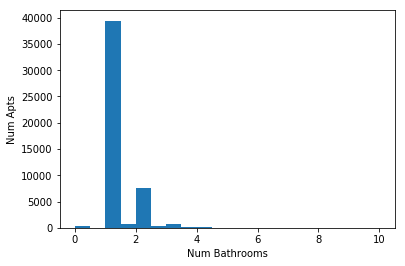

In [225]:
import matplotlib.pyplot as plt

plt.xlabel('Num Bathrooms')
plt.ylabel('Num Apts')
plt.hist(df.bathrooms, bins=20)
plt.show()

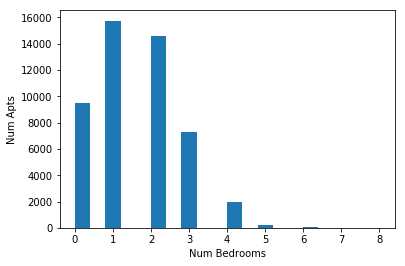

In [226]:
plt.xlabel('Num Bedrooms')
plt.ylabel('Num Apts')
plt.hist(df.bedrooms, bins=20)
plt.show()

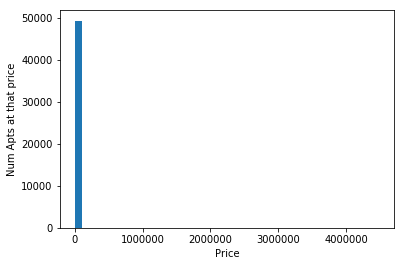

In [227]:
plt.xlabel('Price')
plt.ylabel('Num Apts at that price')
plt.hist(df.price, bins=45) # not useful since loooong right tail
plt.show()

In [228]:
df_log = df.copy()
df_log["price"] = np.log( df["price"] )
#OR:
#df_log["price"] = df["price"].apply(np.log)
df_log.price.head(3)

0    8.006368
1    8.606119
2    7.955074
Name: price, dtype: float64

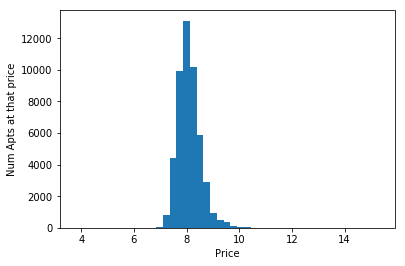

In [229]:
plt.xlabel('Price')
plt.ylabel('Num Apts at that price')
plt.hist(df_log.price, bins=45) # not useful since loooong right tail
plt.show()

### Inter-variable variation

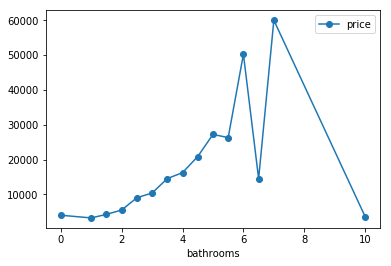

In [230]:
bybaths.plot.line('bathrooms','price', style='-o')   
plt.show()

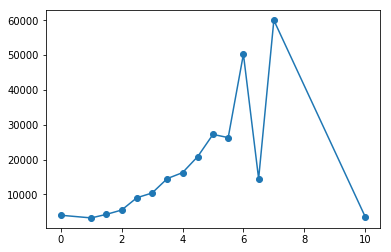

In [231]:
# OR, can do directly
plt.plot(bybaths.bathrooms, bybaths.price, marker='o') # note slightly different arguments
plt.show()

## Clean up

### Prices

In [232]:
df_clean = df[(df.price>1_000) & (df.price<10_000)]

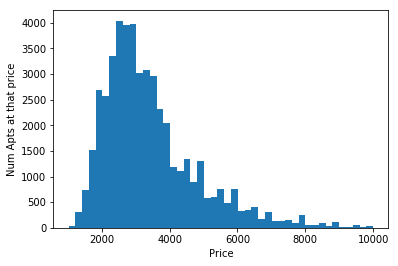

In [233]:
plt.xlabel('Price')
plt.ylabel('Num Apts at that price')
plt.hist(df_clean.price, bins=45) # not useful since loooong right tail
plt.show()

### Location

In [234]:
df_missing = df_clean[(df_clean.longitude==0) | (df_clean.latitude==0)]
len(df_missing)

11

In [235]:
# only 11 filter out
df_clean = df_clean[(df_clean.longitude!=0) | (df_clean.latitude!=0)]

Using [GPS checker](https://gps-coordinates.org/new-york-city-latitude.php) gives a rough outline for New York City of latitude, longitude 40.55, -74.1 on the lower left and 40.94, -73.67 on the upper right. Let's filter others out.

In [236]:
df_clean = df_clean[(df_clean['latitude']>40.55) & (df_clean['latitude']<40.94) &
                    (df_clean['longitude']>-74.1) & (df_clean['longitude']<-73.67)]
print(len(df_clean), len(df))

48300 49352


## Let's train a model

Get numeric fields only:

In [237]:
df_train = df_clean[['bathrooms', 'bedrooms', 'longitude', 'latitude', 'price']]
df_train.head(5)

,bathrooms,bedrooms,longitude,latitude,price
0,1.5,3,-73.9425,40.7145,3000
1,1.0,2,-73.9667,40.7947,5465
2,1.0,1,-74.0018,40.7388,2850
3,1.0,1,-73.9677,40.7539,3275
4,1.0,4,-73.9493,40.8241,3350


In [238]:
X_train = df_train[['bedrooms','bathrooms','latitude','longitude']]
y_train = df_train['price']

In [239]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)

rf.fit(X_train, y_train)
print(f"OOB R^2 score is {rf.oob_score_:.3f} (range is -infinity to 1.0; 1.0 is perfect)")

OOB R^2 score is 0.868 (range is -infinity to 1.0; 1.0 is perfect)


### What does model tell us about features?

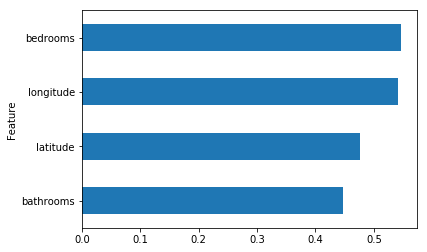

In [240]:
# pip install rfpimp
from rfpimp import *
I = oob_importances(rf, X_train, y_train)
I.plot(kind='barh', legend=False)
plt.show()

## Synthesize features

Add random column of appropriate length

In [241]:
df2 = df.copy()
df2['random'] = np.random.random(size=len(df))
df2.head(2).T

,0,1
listing_id,7211212,7150865
bathrooms,1.5,1
bedrooms,3,2
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130
created,2016-06-24 07:54:24,2016-06-12 12:19:27
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,
display_address,Metropolitan Avenue,Columbus Avenue
features,[],"['Doorman', 'Elevator', 'Fitness Center', 'Cat..."
interest_level,medium,low
latitude,40.7145,40.7947


In [242]:
df2['i'] = [i for i in range(len(df))]
df2.head(2).T

,0,1
listing_id,7211212,7150865
bathrooms,1.5,1
bedrooms,3,2
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130
created,2016-06-24 07:54:24,2016-06-12 12:19:27
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,
display_address,Metropolitan Avenue,Columbus Avenue
features,[],"['Doorman', 'Elevator', 'Fitness Center', 'Cat..."
interest_level,medium,low
latitude,40.7145,40.7947


The data set has a `features` attribute (of type string) with a list of features about the apartment.

In [243]:
df.features.head(5)

0                                                   []
1    ['Doorman', 'Elevator', 'Fitness Center', 'Cat...
2    ['Laundry In Building', 'Dishwasher', 'Hardwoo...
3                        ['Hardwood Floors', 'No Fee']
4                                          ['Pre-War']
Name: features, dtype: object

Let's create three new boolean columns that indicate whether the apartment has a doorman, parking, or laundry.  Start by making a copy of the data frame because we'll be modifying it (otherwise we'll get error "A value is trying to be set on a copy of a slice from a DataFrame"):

In [244]:
df_aug = df[['bedrooms','bathrooms','latitude','longitude',
             'features','price']].copy()

Then we normalize the features column so that missing features values become blanks and we lowercase all of the strings.

In [245]:
# rewrite features column
df_aug['features'] = df_aug['features'].fillna('') # fill missing w/blanks
df_aug['features'] = df_aug['features'].str.lower() # normalize to lower case

Create the three boolean columns by checking for the presence or absence of a string in the features column. 

In [246]:
df_aug['doorman'] = df_aug['features'].str.contains("doorman")
df_aug['parking'] = df_aug['features'].str.contains("parking|garage")
df_aug['laundry'] = df_aug['features'].str.contains("laundry")
del df_aug['features'] # don't need this anymore
df_aug.head(3)

,bedrooms,bathrooms,latitude,longitude,price,doorman,parking,laundry
0,3,1.5,40.7145,-73.9425,3000,False,False,False
1,2,1.0,40.7947,-73.9667,5465,True,False,False
2,1,1.0,40.7388,-74.0018,2850,False,False,True


The other way to drop a column other than `del` is with `drop()` function:

In [247]:
df2 = df.drop('description',axis=1)
df2.head(2).T # kill this column, return new df without that column

,0,1
listing_id,7211212,7150865
bathrooms,1.5,1
bedrooms,3,2
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130
created,2016-06-24 07:54:24,2016-06-12 12:19:27
display_address,Metropolitan Avenue,Columbus Avenue
features,[],"['Doorman', 'Elevator', 'Fitness Center', 'Cat..."
interest_level,medium,low
latitude,40.7145,40.7947
longitude,-73.9425,-73.9667


Let's do some numerical feature stuff

In [248]:
df_aug["beds_to_baths"] = df_aug["bedrooms"]/(df_aug["bathrooms"]+1)
df_aug.head(3)

,bedrooms,bathrooms,latitude,longitude,price,doorman,parking,laundry,beds_to_baths
0,3,1.5,40.7145,-73.9425,3000,False,False,False,1.2
1,2,1.0,40.7947,-73.9667,5465,True,False,False,1.0
2,1,1.0,40.7388,-74.0018,2850,False,False,True,0.5


Beyond our scope here, but let's retrain model to see if it improves OOB score.

In [249]:
df_clean = df_aug[(df.price>1_000) & (df.price<10_000)]
df_train = df_clean[['bathrooms', 'bedrooms', 'longitude', 'latitude',
                   'doorman', 'parking', 'laundry', 'beds_to_baths', 'price']]
X_train = df_train[['bedrooms','bathrooms','latitude','longitude',
                    'doorman', 'parking', 'laundry', 'beds_to_baths']]
y_train = df_train['price']

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
rf.fit(X_train, y_train)
print(f"OOB R^2 score is {rf.oob_score_:.3f} (range is -infinity to 1.0; 1.0 is perfect)")

OOB R^2 score is 0.869 (range is -infinity to 1.0; 1.0 is perfect)


That score is slightly better but not by much.

## Convert categorical to numeric data

This is not general but works for small set of categories:

In [250]:
df['interest_level'] = df['interest_level'].map({'low':1,'medium':2,'high':3})

In [251]:
df[['interest_level']].head(5)

,interest_level
0,2
1,1
2,3
3,1
4,1


## Convert types

In [252]:
df['some_boolean'] = True
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Data columns (total 16 columns):
listing_id         49352 non-null int64
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null datetime64[ns]
description        47906 non-null object
display_address    49217 non-null object
features           49352 non-null object
interest_level     49352 non-null int64
latitude           49352 non-null float64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49342 non-null object
some_boolean       49352 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 5.7+ MB


In [253]:
df['some_boolean'] = df['some_boolean'].astype('int8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Data columns (total 16 columns):
listing_id         49352 non-null int64
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null datetime64[ns]
description        47906 non-null object
display_address    49217 non-null object
features           49352 non-null object
interest_level     49352 non-null int64
latitude           49352 non-null float64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49342 non-null object
some_boolean       49352 non-null int8
dtypes: datetime64[ns](1), float64(3), int64(4), int8(1), object(7)
memory usage: 5.7+ MB


### Convert dates

In [254]:
df['dayofweek'] = df['created'].dt.dayofweek  # add dow column
df['day'] = df['created'].dt.day
df['month'] = df['created'].dt.month
df.head(1).T

,0
listing_id,7211212
bathrooms,1.5
bedrooms,3
building_id,53a5b119ba8f7b61d4e010512e0dfc85
created,2016-06-24 07:54:24
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...
display_address,Metropolitan Avenue
features,[]
interest_level,2
latitude,40.7145


## Feather format

In [255]:
df.to_feather("/tmp/rent.feather")

In [256]:
% time df = pd.read_feather("/tmp/rent.feather")

CPU times: user 82.6 ms, sys: 43 ms, total: 126 ms
Wall time: 124 ms


Compare to loading CSV; like 5x slower:

In [257]:
% time df = pd.read_csv("data/rent.csv")

CPU times: user 679 ms, sys: 75.9 ms, total: 755 ms
Wall time: 753 ms
